In [1]:
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
!unzip /content/drive/MyDrive/Deepfake_videos/DeepfakeCNN.zip

In [2]:
import os
import pickle
import cv2
import math
#import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2473984/45929032 bytes (5.4%)5505024/45929032 bytes (12.0%)8773632/45929032 bytes (19.1%)11755520/45929032 bytes (25.6%)14893056/45929032 bytes (32.4%)17907712/45929032 bytes (39.0%)21037056/45929032 bytes (45.8%)24141824/45929032 bytes (52.6%)27123712/45929032 bytes (59.1%)30154752/45929032 bytes (65.7%)33308672/45929032 bytes (72.5%)36364288/45929032 bytes (79.2%)

In [10]:
#Setting the necessary parameters
img_heigh, img_width = 64, 64
max_img_p_class = 8000

#Setting the input path and labels
input_path = "/content/DeepfakeCNN"
labels = ["Male", "Female"]

model_size = len(labels)

In [19]:
def plot_metric(mn_1, mn_2, plot_name):
  # Get Metric values using metric names as identifiers
  mv_1 = model_training_history.history[mn_1]
  mv_2 = model_training_history.history[mn_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(mv_1))
  
  # Plotting the Graph
  plt.plot(epochs, mv_1, 'blue', label = mn_1)
  plt.plot(epochs, mv_2, 'red', label = mn_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

In [24]:
def gen_dataset():

    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
    
    for index, class_name in enumerate(labels):
        print(f'Extracting Class: {class_name}')
        
        f_l = os.listdir(os.path.join(input_path, class_name))
        for f_n in f_l:

            video_file_path = os.path.join(input_path, class_name, f_n)
            frames = gen_frames(video_file_path)
            temp_features.extend(frames)
 
        features.extend(random.sample(temp_features, max_img_p_class))
        labels.extend([index] * max_img_p_class)
        temp_features.clear()

    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

In [23]:
def gen_frames(video_path):
    
    frames_list = []
    
    # Reading the Video File Using the VideoCapture
    v_read = cv2.VideoCapture(video_path)

    while True:

        succ, frame = v_read.read() 

        # Video not sucessfully read, break the loop
        if not succ:
            break

        #resizing to fixed dimensions
        changed_frame = cv2.resize(frame, (img_heigh, img_width))
        
        # Normalizing the frames
        normalized_frame = changed_frame / 255
      
        frames_list.append(normalized_frame)

    v_read.release()

    return frames_list

In [ ]:
def model_banav():

    model = Sequential()
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (img_heigh, img_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_size, activation = 'softmax'))
    model.summary()

    return model

In [ ]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
#Creating the figure
plt.figure(figsize = (30, 30))

#Getting all male/female classes of the dataset
labels_all = os.listdir('/content/DeepfakeCNN')

#Randomly getting one of the images
r_range = random.sample(range(len(labels_all)), 2)

#Going through all the random samples
for c, index in enumerate(r_range, 1):
  #Getting class name
  s_class_name = labels_all[index]

  #Generating list of all videos present in the directory
  video_files_names_list = os.listdir(f'/content/DeepfakeCNN/{s_class_name}')

  # Randomly selecting a video file
  s_video_name = random.choice(video_files_names_list)

  # Using video capture to load the videos
  v_reader = cv2.VideoCapture(f'/content/DeepfakeCNN/{s_class_name}/{s_video_name}')

  # First frame read
  _, bgr_frame = v_reader.read()

  # Closing the VideoCapture object and releasing all resources.
  v_reader.release()

  # BGR Frame to RGB Frame
  rgb_f = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

  #Adding caption to the frame
  cv2.putText(rgb_f, s_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

  # Assigning the Frame to a specific position of a subplot
  plt.subplot(5, 4, c)

  plt.imshow(rgb_f)

  plt.axis('off')


In [26]:
#Setting the necessary parameters
img_heigh, img_width = 64, 64
max_img_p_class = 8000

#Setting the input path and labels
input_path = "/content/DeepfakeCNN"
labels = ["Male", "Female"]

model_size = len(labels)

In [ ]:
features, labels = gen_dataset()

In [ ]:

pickle.dump(features, open('/content/drive/MyDrive/Deepfake_videos/features', 'wb'))

In [4]:
pickle.dump(labels,open('/content/drive/MyDrive/Deepfake_videos/labels','wb'))

In [5]:
path_labels_train = "/content/drive/MyDrive/Deepfake_videos/features (1)"
with open(path_labels_train, 'rb') as data:
    features = pickle.load(data)

In [6]:
path_labels_train = "/content/drive/MyDrive/Deepfake_videos/labels"
with open(path_labels_train, 'rb') as data:
    labels = pickle.load(data)

In [7]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [8]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, 
                                                                            test_size = 0.3, shuffle = True, 
                                                                            random_state = seed_constant)

In [11]:
# Let's create a function that will construct our model
def create_model():

    # We will use a Sequential model for model construction
    model = Sequential()

    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))

    # Printing the models summary
    model.summary()

    return model


# Calling the create_model method
model = create_model()

print("Model Created Successfully!")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                      

In [16]:
# Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, epochs =30, batch_size = 4 , shuffle = True, validation_split = 0.3, callbacks = [early_stopping_callback])

Epoch 1/30
1960/1960 [==============================] - 256s 130ms/step - loss: 0.7037 - accuracy: 0.5774 - val_loss: 1.3166 - val_accuracy: 0.5070
Epoch 2/30
1960/1960 [==============================] - 242s 123ms/step - loss: 0.6861 - accuracy: 0.5942 - val_loss: 0.6444 - val_accuracy: 0.6394
Epoch 3/30
1960/1960 [==============================] - 244s 124ms/step - loss: 0.6782 - accuracy: 0.6034 - val_loss: 0.8451 - val_accuracy: 0.5989
Epoch 4/30
1960/1960 [==============================] - 242s 124ms/step - loss: 0.6652 - accuracy: 0.6126 - val_loss: 1.3905 - val_accuracy: 0.5046
Epoch 5/30
1960/1960 [==============================] - 240s 123ms/step - loss: 0.6496 - accuracy: 0.6289 - val_loss: 0.7174 - val_accuracy: 0.6049
Epoch 6/30
1960/1960 [==============================] - 241s 123ms/step - loss: 0.6293 - accuracy: 0.6479 - val_loss: 0.7988 - val_accuracy: 0.6177
Epoch 7/30
1960/1960 [==============================] - 240s 122ms/step - loss: 0.5935 - accuracy: 0.6840 - val_

In [17]:
model_evaluation_history = model.evaluate(features_test, labels_test)

150/150 [==============================] - 32s 211ms/step - loss: 0.0672 - accuracy: 0.9777


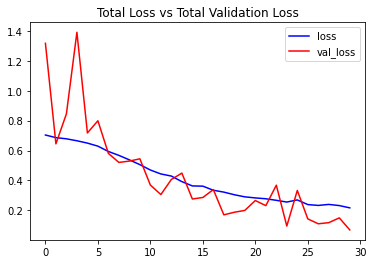

In [20]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

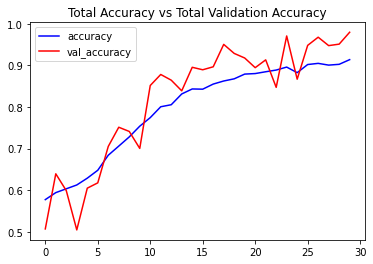

In [21]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [29]:
from IPython.display import HTML
from base64 import b64encode
import os

# Compressed video path
compressed_path = "/content/018_019.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [30]:
features=[]
input='/content/018_019.mp4'
frames = gen_frames(input)
features.extend(random.sample(frames, 2))
features = np.asarray(features)

In [31]:
new_predict = model.predict(features)
new_predict = new_predict.argmax(axis=-1)
new_predict
if new_predict[0]==0:
  print("male")
else:
  print("female")

male


In [32]:
from IPython.display import HTML
from base64 import b64encode
import os

# Compressed video path
compressed_path = "/content/049_946.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [33]:
features=[]
input='/content/049_946.mp4'
frames = gen_frames(input)
features.extend(random.sample(frames, 2))
features = np.asarray(features)

new_predict = model.predict(features)
new_predict = new_predict.argmax(axis=-1)
new_predict
if new_predict[0]==0:
  print("male")
else:
  print("female")

female


In [34]:
from IPython.display import HTML
from base64 import b64encode
import os

# Compressed video path
compressed_path = "/content/069_961.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [35]:
features=[]
input='/content/069_961.mp4'
frames = gen_frames(input)
features.extend(random.sample(frames, 2))
features = np.asarray(features)

new_predict = model.predict(features)
new_predict = new_predict.argmax(axis=-1)
new_predict
if new_predict[0]==0:
  print("male")
else:
  print("female")

female


In [36]:
from IPython.display import HTML
from base64 import b64encode
import os

# Compressed video path
compressed_path = "/content/119_123.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [37]:
features=[]
input='/content/119_123.mp4'
frames = gen_frames(input)
features.extend(random.sample(frames, 2))
features = np.asarray(features)

new_predict = model.predict(features)
new_predict = new_predict.argmax(axis=-1)
new_predict
if new_predict[0]==0:
  print("male")
else:
  print("female")

male


In [38]:
from IPython.display import HTML
from base64 import b64encode
import os

# Compressed video path
compressed_path = "/content/013_883 (1).mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [39]:
features=[]
input='/content/013_883 (1).mp4'
frames = gen_frames(input)
features.extend(random.sample(frames, 2))
features = np.asarray(features)

new_predict = model.predict(features)
new_predict = new_predict.argmax(axis=-1)
new_predict
if new_predict[0]==0:
  print("male")
else:
  print("female")

male


### Conclusion

Out of 5 videos that we have experimented 3 of them are actually classified as Male. Reason we can observe from the data is that these videos which are actually classified a Male have women wearing suits and formal outfits and have short hair. It seems the algorithm confuses them for being a male.